# 📖 TABLE OF CONTENTS

- [1. VGG16 Model: Intro]()
- [2. VGG16 Architecture]()
- [3. VGG16 from scratch using High-Level Keras API]()
- [4. VGG16 from scratch using Low-Level TensorFlow API]()
- [5. VGG16 from scratch using PyTorch]()

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. VGG16 Model: Intro

VGG16 is a CNN (Convolutional Neural Network) architecture which was used to win ILSVRC (Imagenet) competition in 2014. It was proposed by the Visual Geometry Group (VGG) at the University of Oxford. It is considered to be one of the excellent vision model architecture till date. The pre-trained version of the VGG16 network is trained on over 1 million images from the ImageNet visual database, and is able to classify images into 1,000 different categories with 92.7 % top-5 test accuracy.

**Note**

 Top-5 accuracy measures the percentage of test images for which the correct label is among the top five predicted labels out of 1000 labels of ImageNet challenge dataset.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. VGG16 Architecture

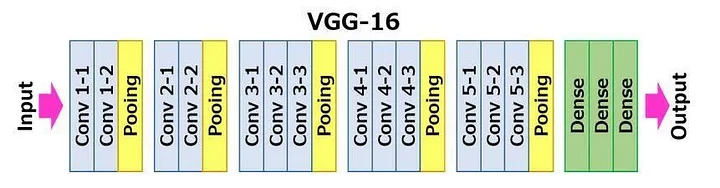

In [ ]:
# VGG16 Layers

from IPython import display
display.Image("data/images/CV_04_VGG16_Model-01-VGG16-Layers.jpg")

In the above figure, we have

- Convolution Layers
    - Conv 1 has 2 layers with 64 filters each
    - Conv 2 has 2 layers with 128 filters each
    - Conv 3 has 3 layers with 256 filters each
    - Conv 4 has 3 layers with 512 filters each
    - Conv 5 has 3 layers with 512 filters each
    - Total $2 + 2 + 3 + 3 + 3 = 13$ Convolution layers $\implies$ Responsible for feature extraction
    - All Convolution layers use $3 \times 3$ filter with stride $1$ and `padding='same'` (no change in resolution before Pooling operation)
    - Maxpool layer of $2 \times 2$ with stride $2$
- FC (Fully Connected) or Dense layers
    - $3$ Fully Connected layers $\implies$ Responsible for classification
    - FC 1 has 4096 Perceptrons
    - FC 2 has 4096 Perceptrons
    - FC 3 has 1000 Perceptrons (since 1000 classes in ImageNet dataset)
- Total $13 + 3 = 16$ trainable layers $\implies$ model named as VGG16
- Final layer $\implies$ Softmax layer

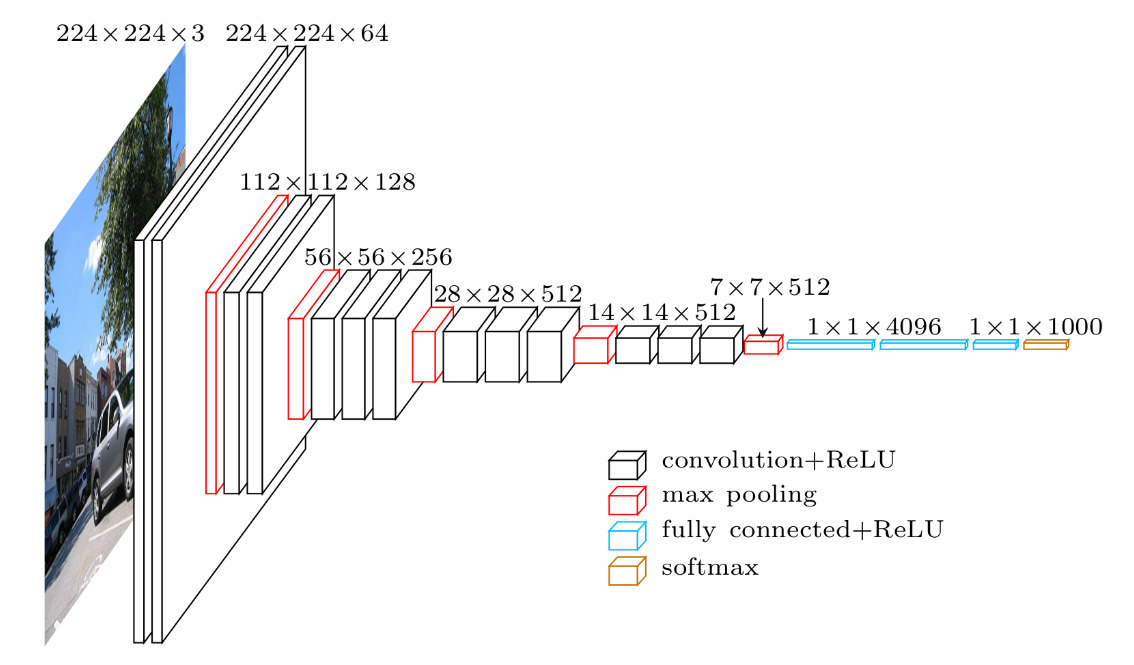

In [ ]:
# VGG16 Architecture

from IPython import display
display.Image("data/images/CV_04_VGG16_Model-02-VGG16-Architecture.jpg")

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. VGG16 from scratch using High-Level Keras API

In [1]:
# Install dependencies
!pip3 install tensorflow

In [2]:
# Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [3]:
# Method 1
def build_vgg16_keras():
    model = Sequential()

    # CNN portion of the model responsible for feature extraction
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))  # Conv 1-1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))  # Conv 1-2
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))  # Conv 2-1
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))  # Conv 2-2
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))  # Conv 3-1
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))  # Conv 3-2
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))  # Conv 3-3
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))  # Conv 4-1
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))  # Conv 4-2
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))  # Conv 4-3
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))  # Conv 5-1
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))  # Conv 5-2
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))  # Conv 5-3
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Set of feature maps are flattened to create a 1D vector called an image embedding
    model.add(Flatten())

    # MLP (Multi-Layer Perceptron) portion of the model responsible for classification
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(1000, activation='softmax'))

    return model

vgg16_keras_model = build_vgg16_keras()
vgg16_keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [4]:
# Method 2
class VGG16_Keras(tf.keras.Model):
    def __init__(self):
        super(VGG16_Keras, self).__init__()
        self.conv1_1 = Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3))
        self.conv1_2 = Conv2D(64, (3, 3), activation='relu', padding='same')
        self.pool_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))

        self.conv2_1 = Conv2D(128, (3, 3), activation='relu', padding='same')
        self.conv2_2 = Conv2D(128, (3, 3), activation='relu', padding='same')
        self.pool_2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))

        self.conv3_1 = Conv2D(256, (3, 3), activation='relu', padding='same')
        self.conv3_2 = Conv2D(256, (3, 3), activation='relu', padding='same')
        self.conv3_3 = Conv2D(256, (3, 3), activation='relu', padding='same')
        self.pool_3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))

        self.conv4_1 = Conv2D(512, (3, 3), activation='relu', padding='same')
        self.conv4_2 = Conv2D(512, (3, 3), activation='relu', padding='same')
        self.conv4_3 = Conv2D(512, (3, 3), activation='relu', padding='same')
        self.pool_4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))

        self.conv5_1 = Conv2D(512, (3, 3), activation='relu', padding='same')
        self.conv5_2 = Conv2D(512, (3, 3), activation='relu', padding='same')
        self.conv5_3 = Conv2D(512, (3, 3), activation='relu', padding='same')
        self.pool_5 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))

        self.flatten = Flatten()

        self.fc1 = Dense(4096, activation='relu')
        self.fc2 = Dense(4096, activation='relu')
        self.fc3 = Dense(1000, activation='softmax')

    def call(self, inputs):
        x = self.conv1_1(inputs)
        x = self.conv1_2(x)
        x = self.pool_1(x)

        x = self.conv2_1(x)
        x = self.conv2_2(x)
        x = self.pool_2(x)

        x = self.conv3_1(x)
        x = self.conv3_2(x)
        x = self.conv3_3(x)
        x = self.pool_3(x)

        x = self.conv4_1(x)
        x = self.conv4_2(x)
        x = self.conv4_3(x)
        x = self.pool_4(x)

        x = self.conv5_1(x)
        x = self.conv5_2(x)
        x = self.conv5_3(x)
        x = self.pool_5(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)

        return x

# Instantiate the model
vgg16_keras_model2 = VGG16_Keras()

# Create a dummy input tensor to build the model and print the summary
dummy_input = tf.random.normal([1, 224, 224, 3])
vgg16_keras_model2(dummy_input)  # Forward pass to build the model

# Print the model summary
vgg16_keras_model2.summary()

Model: "vgg16__keras"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          multiple                  1792      
                                                                 
 conv2d_14 (Conv2D)          multiple                  36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  multiple                  0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          multiple                  73856     
                                                                 
 conv2d_16 (Conv2D)          multiple                  147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  multiple                  0         
 g2D)                                                 

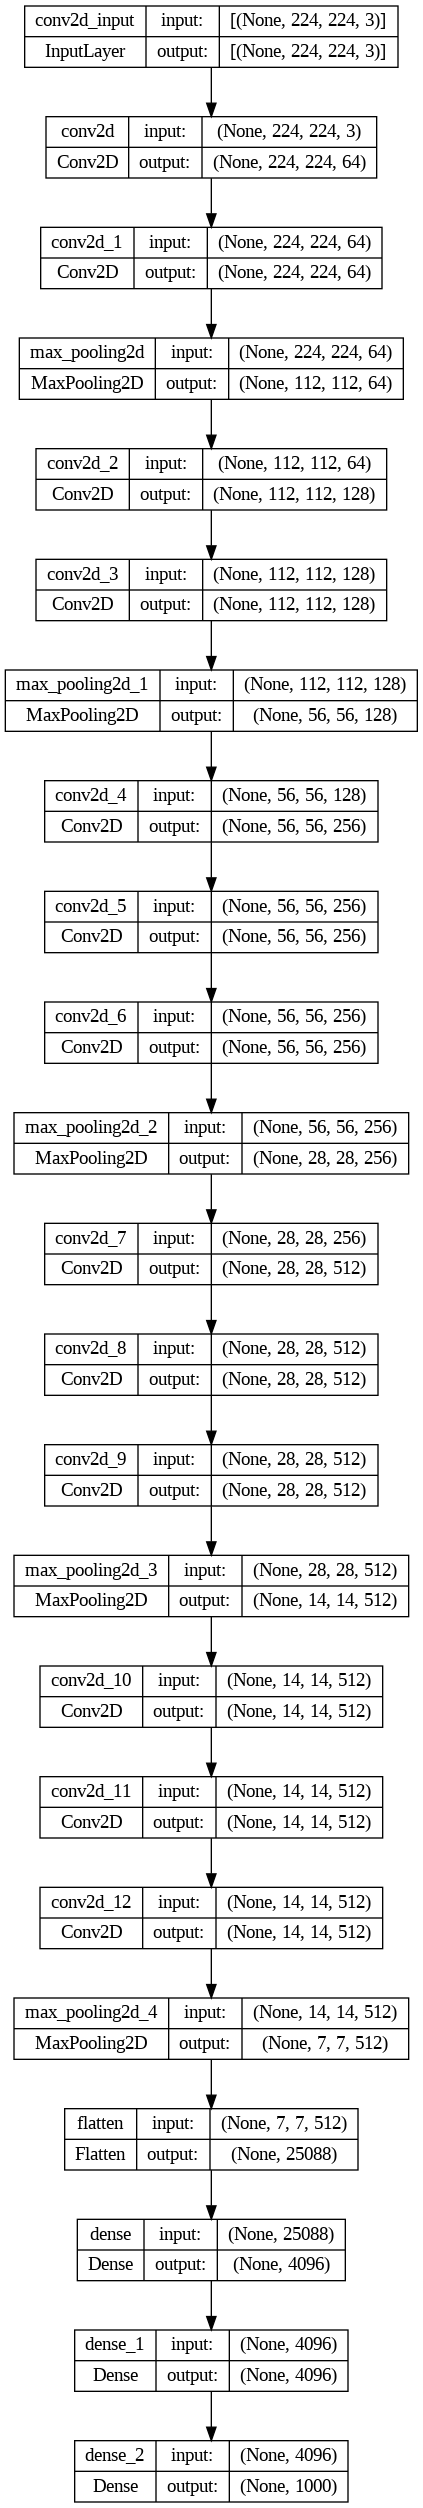

In [5]:
# Plot the model architecture
plot_model(vgg16_keras_model, to_file='VGG16-Keras-Architecture.png', show_shapes=True, show_layer_names=True)

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. VGG16 from scratch using Low-Level TensorFlow API

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 5. VGG16 from scratch using PyTorch

In [13]:
# Install dependencies
!pip3 install torch torchvision torchviz torchinfo

In [14]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchviz import make_dot
from torchinfo import summary

In [15]:
class VGG16_PyTorch(nn.Module):
    def __init__(self):
        super(VGG16_PyTorch, self).__init__()
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.pool_1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.pool_2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.pool_3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.pool_4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.pool_5 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(512 * 7 * 7, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 1000)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.pool_1(x)

        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.pool_2(x)

        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        x = self.pool_3(x)

        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = self.pool_4(x)

        x = F.relu(self.conv5_1(x))
        x = F.relu(self.conv5_2(x))
        x = F.relu(self.conv5_3(x))
        x = self.pool_5(x)

        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)

        return x

In [16]:
# Instantiate the model
vgg16_pytorch_model = VGG16_PyTorch()

In [17]:
# Print model summary
batch_size = 1
summary(vgg16_pytorch_model, input_size=(batch_size, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG16_PyTorch                            [1, 1000]                 --
├─Conv2d: 1-1                            [1, 64, 224, 224]         1,792
├─Conv2d: 1-2                            [1, 64, 224, 224]         36,928
├─MaxPool2d: 1-3                         [1, 64, 112, 112]         --
├─Conv2d: 1-4                            [1, 128, 112, 112]        73,856
├─Conv2d: 1-5                            [1, 128, 112, 112]        147,584
├─MaxPool2d: 1-6                         [1, 128, 56, 56]          --
├─Conv2d: 1-7                            [1, 256, 56, 56]          295,168
├─Conv2d: 1-8                            [1, 256, 56, 56]          590,080
├─Conv2d: 1-9                            [1, 256, 56, 56]          590,080
├─MaxPool2d: 1-10                        [1, 256, 28, 28]          --
├─Conv2d: 1-11                           [1, 512, 28, 28]          1,180,160
├─Conv2d: 1-12                           [1, 51

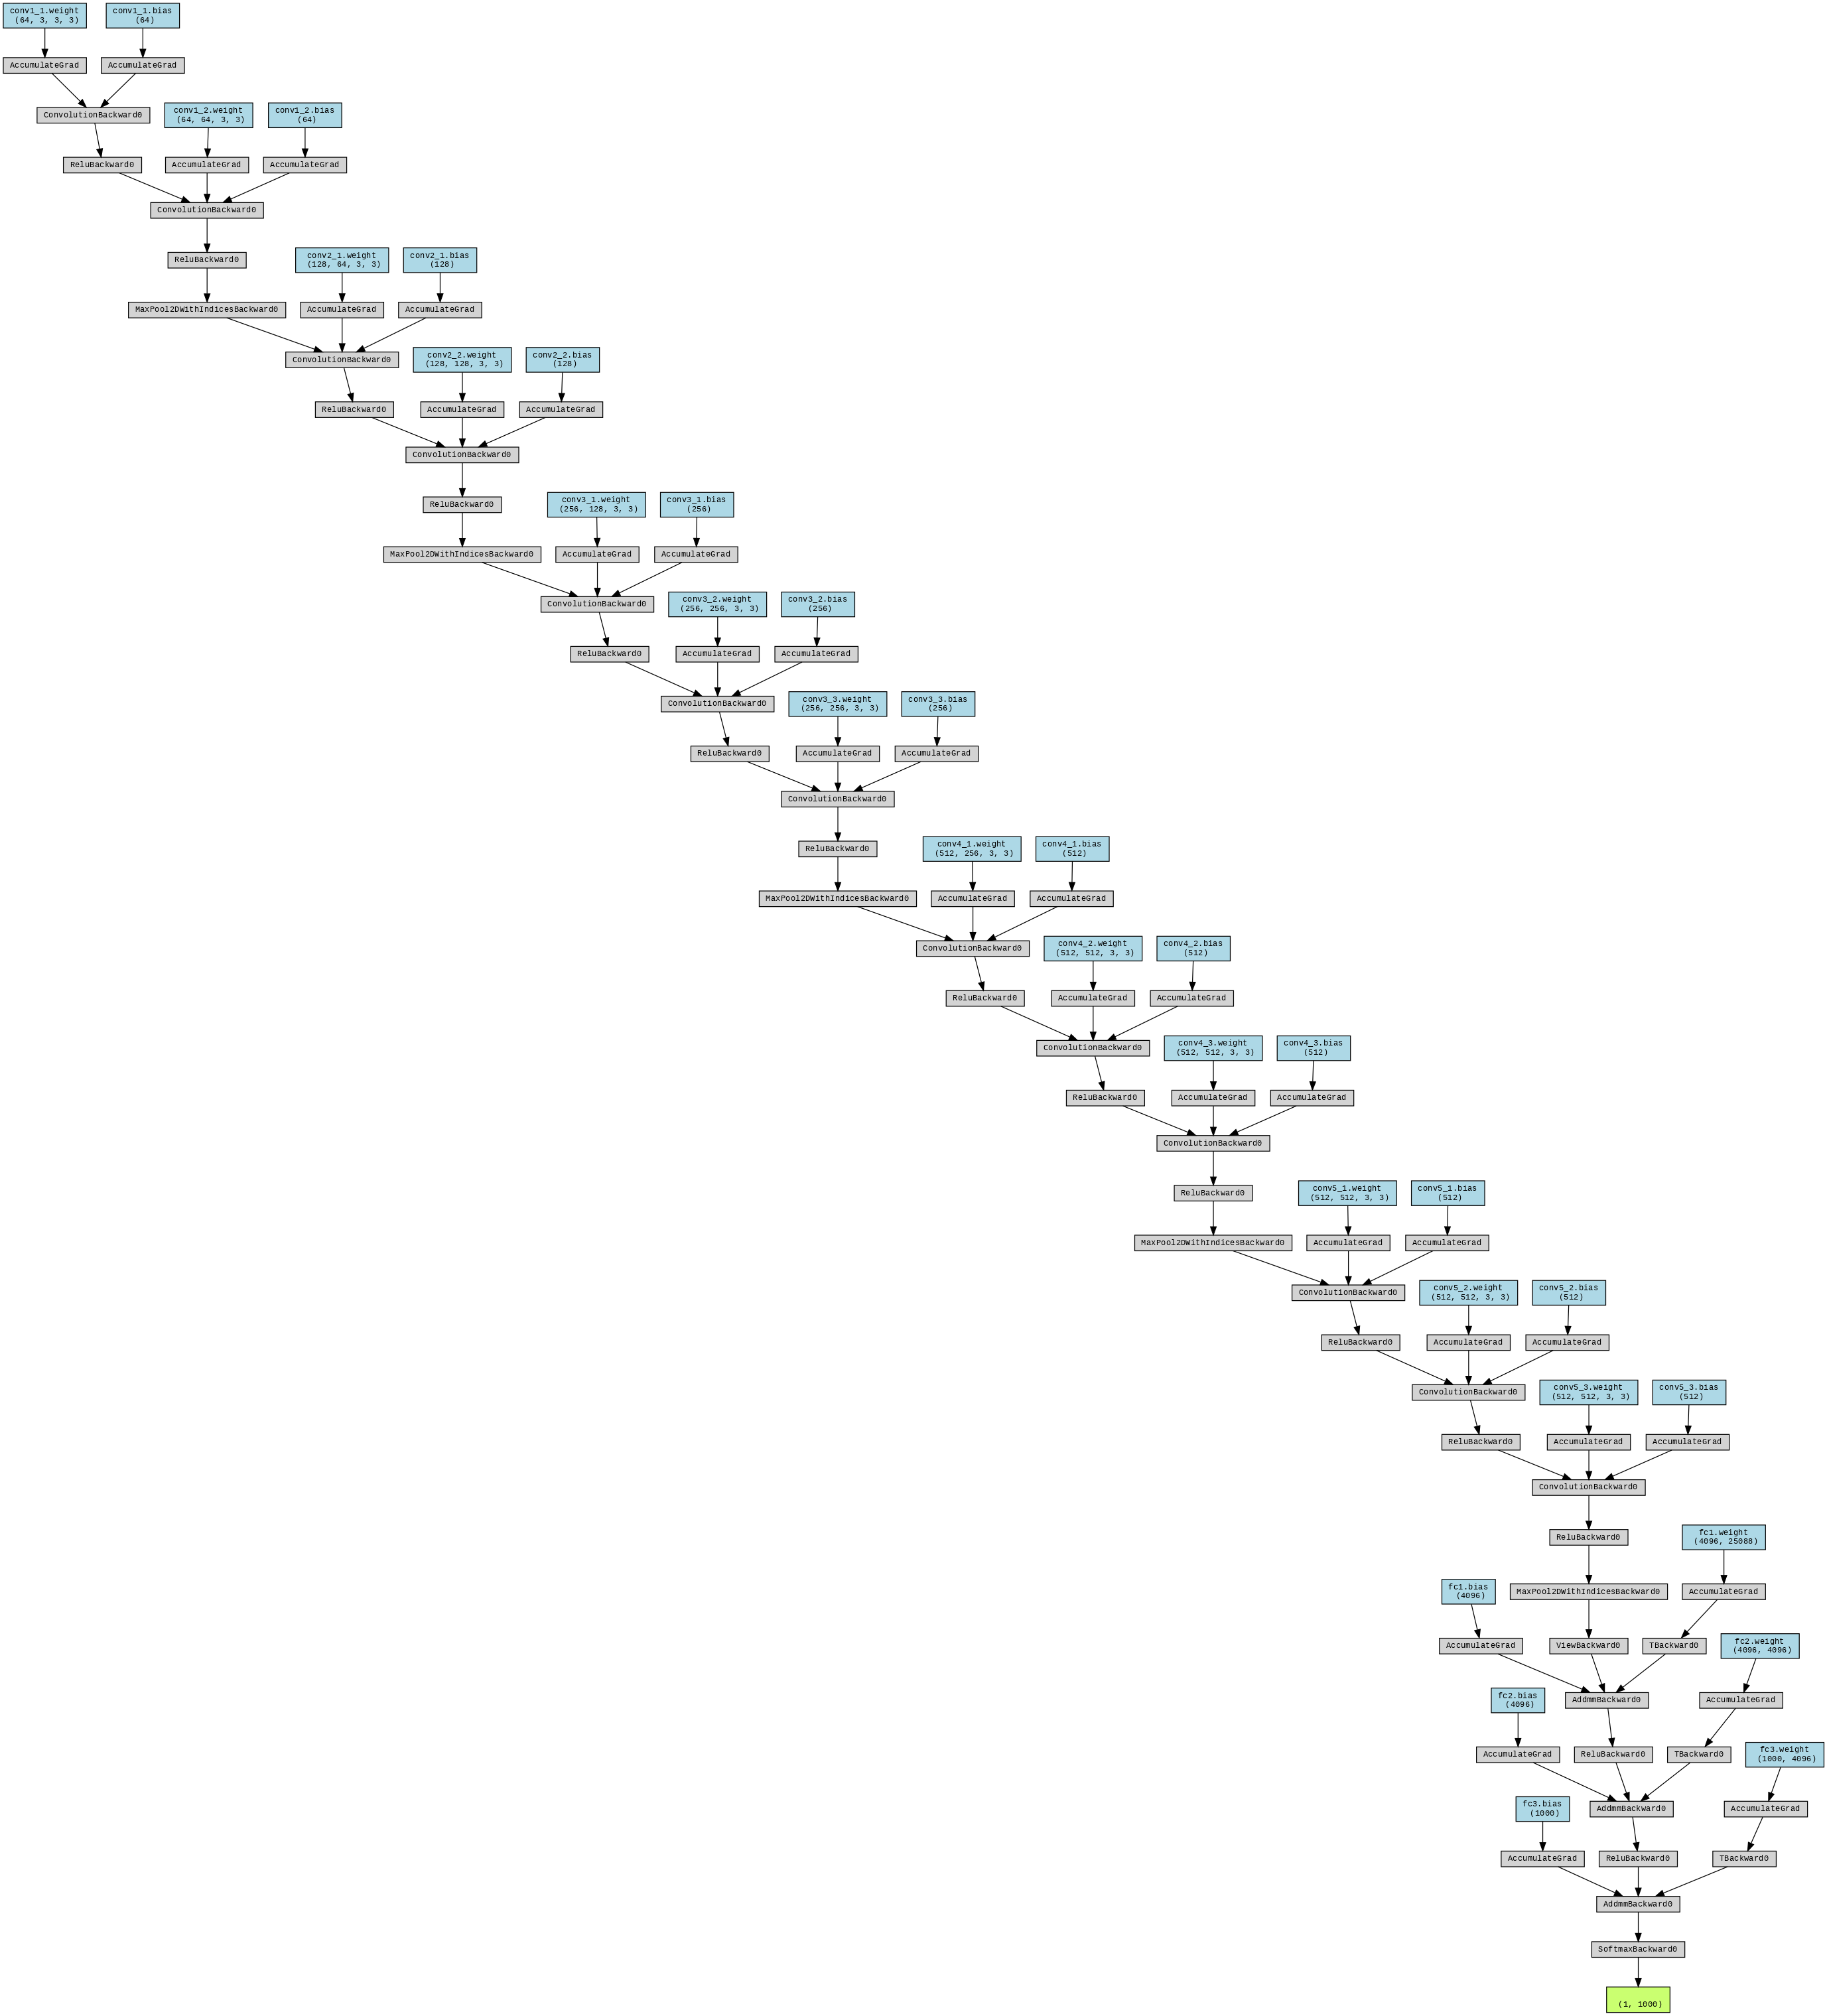

In [19]:
# Create a dummy input tensor to plot the model architecture
dummy_input = torch.randn(1, 3, 224, 224)

# Generate the graph using torchviz
model_viz = make_dot(vgg16_pytorch_model(dummy_input), params=dict(vgg16_pytorch_model.named_parameters()))

# Save the model architecture
model_viz.render("VGG16-PyTorch-Architecture", format="png")

# Display the model architecture
from IPython import display
display.Image("VGG16-PyTorch-Architecture.png")

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)